
<a id="about"></a>

<p style="background-color:dark;font-family:David;font-size:300%;color:white;text-align:center;border-radius:90px 90px; padding:7px">Prediction of Energy Consumption by using Machine learning algorithms</p>


<h4 style="text-align: center; font-family: David  ; font-size : 25px ">
    Programed by Mohammadmahdi Jadidi </h4>
    
<div style="text-align:center">
    <img src="https://media.licdn.com/dms/image/v2/D5612AQEAv9qx9Gjv_A/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1696509625359?e=2147483647&v=beta&t=O_6dDnqZdIP3S7YFhNDwHEGUtM06F46FvnbKWYiKICk" alt="Image" style="width: 100%; height: auto;"  />
</div>



<h4 style="; font-family: David  ; font-size : 40px ">
     ----  What is the purpose of this project? ---- </h4>
          We have a Data Set of energy consumption available based on various factors, such as the temperature on that day, the type of building, the number of people living in that environment, etc..
          And then, by first analyzing and understanding the behavior of previous examples, and building AI (Machine learning) model, try to make new predictions of Energy Consumption using different factors.
          
          
          The factors affecting energy consumption, which are also used in this dataset, are as follows:
          


 **Features**
- Building Type
- Square Footage
- Number of Occupants
- Appliances Used
- Average Temperature
- Day of Week
- Energy Consumption
---  

### Building Type  
- **Values**: Industrial, Commercial, Residential  
- **Description**: Indicates the type of building, which can be either Industrial, Commercial, or Residential.  

### Square Footage  
- **Description**: Represents the total area of the building measured in square feet.  

### Number of Occupants  
- **Description**: The total number of individuals residing in or utilizing the building.  

### Appliances Used  
- **Description**: A list of electrical appliances and devices utilized within the building.  

### Average Temperature  
- **Description**: The average temperature within the building, recorded in degrees Fahrenheit or Celsius.  

### Day of Week  
- **Values**: weekday, weekend  
- **Description**: Indicates whether the data corresponds to a regular weekday (weekday) or a weekend (weekend).  

### Energy Consumption  
- **Description**: The amount of energy consumed by the building, typically measured in kilowatt-hours (kWh).  



       
 
     

_______________________________________________




<a id="about"></a>
<!-- omit in toc -->              
 <p style="background-color:dark;font-family:David;font-size:120%;color:white;text-align:center;border-radius:50px 50px; padding:7px">Table of Contents</p>

 
1.  [**Import Basic Libraries and import DataSet**](#1)     
1.  [**Data Analysis and getting information**](#2) 
1.  [**Visualization**](#3) 
1.  [**Machine Learning make the linear regression**](#4)
1. [Final inout and predict the unseen data](#5)

<a id="1"></a>
# <p style="background-color:green;font-family:David;font-size:120%;color:white;text-align:center;border-radius:50px 50px; padding:7px">Import Basic Libraries</p>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import kagglehub 
import warnings  
warnings.filterwarnings('ignore')  
import plotly.express as px 
%matplotlib inline  
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [5]:
Train_df = pd.DataFrame(pd.read_csv('/kaggle/input/energy-consumption/train_energy_data.csv') )
Test_df = pd.DataFrame(pd.read_csv('/kaggle/input/energy-consumption/test_energy_data.csv') )
#insert TEst Data Frame to Train Data Frame 
Data_Frame = pd.concat([Train_df,Test_df])

In [6]:
print('shape of train data :' , Train_df.shape)
print('shape of test data :' , Test_df.shape)
print('shape of Final dataframe :' , Data_Frame.shape)

shape of train data : (1000, 7)
shape of test data : (100, 7)
shape of Final dataframe : (1100, 7)


In [7]:
Green_Theme = sns.light_palette('Red',as_cmap=True)

<a id="2"></a>
# <p style="background-color:green;font-family:David;font-size:120%;color:white;text-align:center;border-radius:50px 50px; padding:7px">Data Analysis and getting information</p>

In [8]:
Data_Frame.reset_index(inplace=True,drop=['index'])
Describer = (Data_Frame.describe(include='all'))
Describer.rename({'count' : 'Count of sample per Columns', 'unique':'Each Unique Value in per Columns', 'top' : 'Most repeated Sample'},inplace=True)
Describer.agg(['Count of sample per Columns','Each Unique Value in per Columns','Most repeated Sample']).style.background_gradient(Green_Theme)


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
Count of sample per Columns,1100,1100.000000,1100.000000,1100.000000,1100.000000,1100,1100.000000
Each Unique Value in per Columns,3,nan,nan,nan,nan,2,nan
Most repeated Sample,Residential,nan,nan,nan,nan,Weekday,nan


In [9]:
Data_Frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


In [10]:
Noiser = pd.DataFrame(Data_Frame.isnull().sum(),columns=['Count of MissValues'])
Noiser.style.background_gradient(Green_Theme)

,Count of MissValues
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


In [11]:
print('count of double values :' ,Data_Frame.duplicated().sum())

count of double values : 0


In [12]:
Data_Frame['Building Type'].unique()

array(['Residential', 'Commercial', 'Industrial'], dtype=object)

In [13]:
#prepair and data mining for vir
import plotly.graph_objects as go 
Table1 = go.Figure(data=[go.Table(header = dict (values = ['Index' , ' Build Type'], line_color = 'yellow',fill_color = 'darkslategray',align = 'left'), cells = dict(values=[['1' , '2' , '3'], Data_Frame['Building Type'].unique()],line_color = ' yellow' , fill_color = 'darkslategray',align = 'left'))])
Table1.update_layout(autosize = True,template = 'plotly_dark')
Table1.show()

In [14]:
Data_Frame['Day of Week'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [15]:
total_sum = np.ceil(Data_Frame['Energy Consumption'].sum()) + 1 
total_sum_Residential = np.ceil(Data_Frame[Data_Frame['Building Type'] == 'Residential']['Energy Consumption'].sum())
total_sum_Commercial = np.ceil (Data_Frame[Data_Frame['Building Type'] == 'Commercial']['Energy Consumption'].sum())
total_sum_Industrial = np.ceil (Data_Frame[Data_Frame['Building Type'] == 'Industrial']['Energy Consumption'].sum())

Relative_Frequency_Precent_Residential = round(total_sum_Residential / total_sum,2) * 100 
Relative_Frequency_Precent_Commercial = np.ceil((total_sum_Commercial / total_sum) * 100) 
Relative_Frequency_Precent_Industrial = round(total_sum_Industrial / total_sum,2) * 100 
print((total_sum_Residential + total_sum_Commercial + total_sum_Industrial) == total_sum)
Relative_Frequency_Precents =  {'Energy Consumption in Residential' : Relative_Frequency_Precent_Residential,
                              'Energy Consumption in Commercial' : Relative_Frequency_Precent_Commercial,
                              'Energy Consumption in Industrial' : Relative_Frequency_Precent_Industrial}
df_pie_precent = pd.DataFrame(data=Relative_Frequency_Precents,index = ['Precent']).T
df_pie_precent['Building Type'] = ['Energy Consumption in Residential' , 'Energy Consumption in Commercial' , 'Energy Consumption in Industrial']
df_pie_precent.reset_index(drop='index',inplace = True)

columns = list(df_pie_precent.columns)
columns[1], columns[0] = columns[0], columns[1]
df_pie_precent = df_pie_precent[columns]
df_pie_precent



total_sum_days = np.ceil(Data_Frame['Energy Consumption'].sum()) 
total_sum_Weekday = np.ceil(Data_Frame[Data_Frame['Day of Week'] == 'Weekday']['Energy Consumption'].sum())
total_sum_Weekend = np.ceil (Data_Frame[Data_Frame['Day of Week'] == 'Weekend']['Energy Consumption'].sum())
Relative_Frequency_Precent_Weekday = round(total_sum_Weekday / total_sum_days,2) * 100 
Relative_Frequency_Precent_Weekend = np.ceil((total_sum_Weekend / total_sum_days) * 100) 
print((total_sum_Weekday + total_sum_Weekend ) == total_sum_days)
Relative_Frequency_Precents_days =  {'Energy Consumption in Weekday' : Relative_Frequency_Precent_Weekday,
                              'Energy Consumption in Weekend' : Relative_Frequency_Precent_Weekend}
df_pie_precent_days = pd.DataFrame(data=Relative_Frequency_Precents_days,index = ['Precent']).T
df_pie_precent_days['Day of Week'] = ['Energy Consumption in Weekday' , 'Energy Consumption in Weekend']
df_pie_precent_days.reset_index(drop='index',inplace = True)
columns = list(df_pie_precent_days.columns)
columns[1], columns[0] = columns[0], columns[1]
df_pie_precent_days = df_pie_precent_days[columns]

df_pie_precent_days

True
True


,Day of Week,Precent
0,Energy Consumption in Weekday,50.0
1,Energy Consumption in Weekend,50.0


<a id="3"></a>
# <p style="background-color:green;font-family:David;font-size:120%;color:white;text-align:center;border-radius:50px 50px; padding:7px">Data Analysis and getting information</p>

In [16]:
funnel1 = px.funnel(df_pie_precent,y = 'Building Type',x = 'Precent',color_discrete_sequence = ['yellow'],title = 'Precent total of each build type (X Axis = Precent%)',template = 'plotly_dark')
funnel1.update_layout(font = dict(family="Roman",size=20,color="white"))
funnel1.show()
funnel1.write_html("B:\\1.html")

In [17]:
#pie chart 
pie1 = px.pie(df_pie_precent,values='Precent',color='Building Type',names='Building Type',color_discrete_map={'Energy Consumption in Industrial' : 'green','Energy Consumption in Commercial' : 'seagreen','Energy Consumption in Residential' : 'springgreen'},
              template  = 'plotly_dark',opacity = 0.8 ,hole = 0.3,title = 'Precent of Energy Consumption in each Build')
pie1.update_layout(autosize = True , font =dict(family="Roman",size=20,color="white")
)
pie1.show()
pie1.write_html("B:\\2.html")

In [20]:
#dutribut
import plotly.express as px
bar1 = px.box(Data_Frame, x='Building Type', y='Energy Consumption', points='all')
bar1.update_layout(bargap=1, title='Energy Consumption each sample in Building Type')
bar1.show()

In [19]:
Data_Frame['Building Type'].replace('Industrial' , 0,inplace=True)
Data_Frame['Building Type'].replace('Commercial' , 1,inplace=True)
Data_Frame['Building Type'].replace('Residential' , 2,inplace=True)

Data_Frame['Day of Week'].replace('Weekday' , 0,inplace=True)
Data_Frame['Day of Week'].replace('Weekend' , 1,inplace=True)

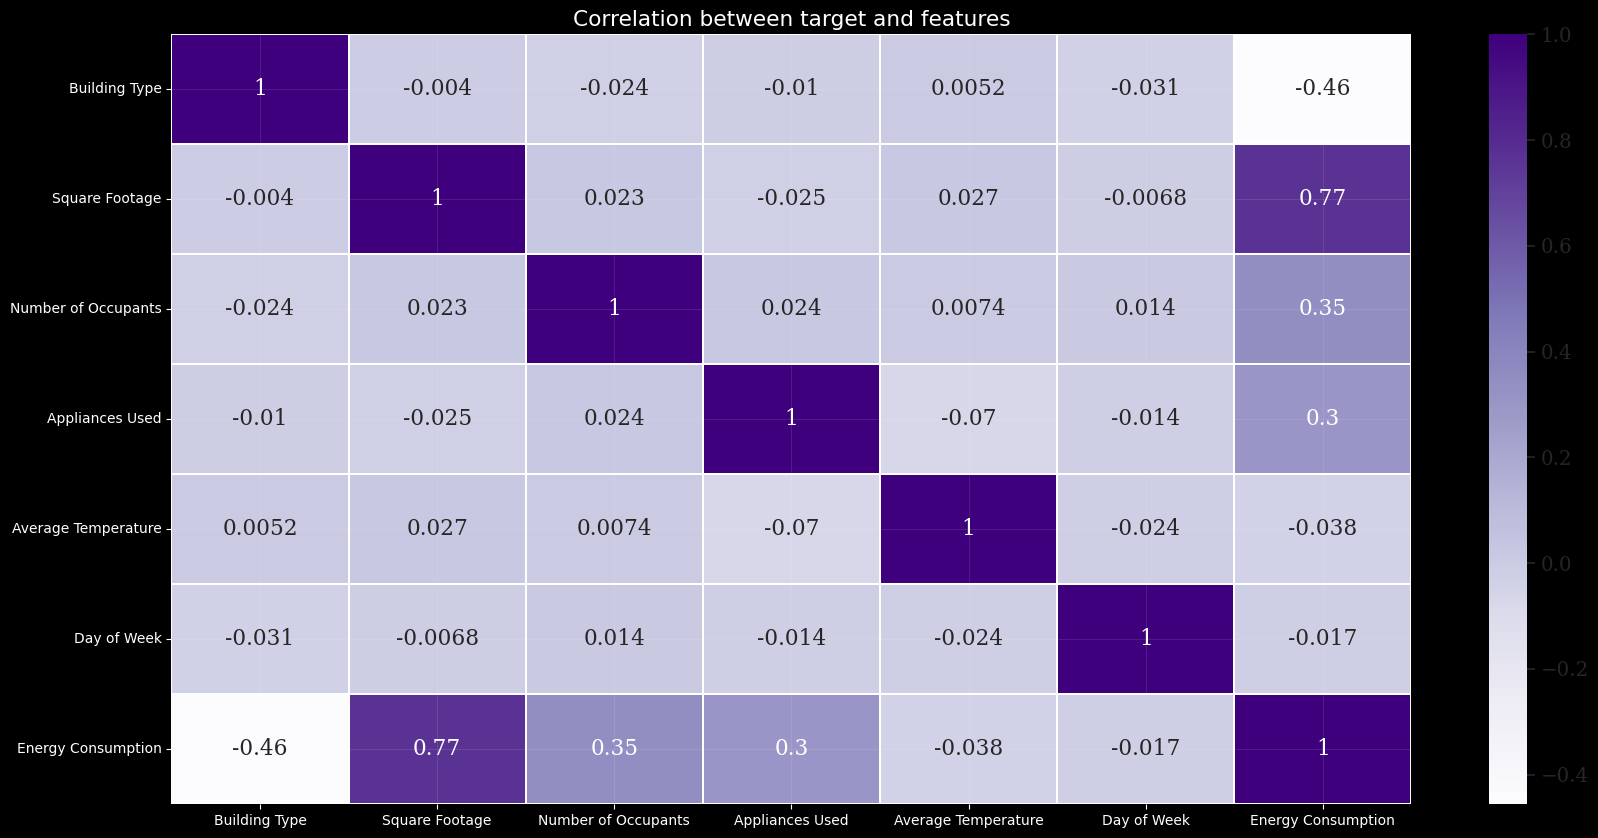

In [17]:
#regression feature extraction and virtulaziation
#check the corrolation of the feature between taget(y)
corr = (Data_Frame.corr())
plt.style.use('dark_background')
plt.figure(figsize= (20,10))
plt.grid(alpha = .1)
sns.set(font_scale=1.3)
sns.set_style({'font.family':'serif','font.serif' : 'Times New Romans'})
sns.heatmap(corr,annot=True,linewidths=0.2,cmap='Purples',xticklabels=Data_Frame.columns,yticklabels=Data_Frame.columns)
plt.title('Correlation between target and features')
plt.show()


In [18]:
Data_Frame.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [19]:
#virtulaziation steps 
#in this step i wanna plot each feature (discrete and contnuous) with target. 
MultiLine_target = go.Figure()
MultiLine_target.add_trace(go.Scatter(x=Data_Frame['Square Footage'].sort_values(), y=Data_Frame['Energy Consumption'],name='Square Footage',line_color='red'))
MultiLine_target1 = go.Figure()
MultiLine_target1.add_trace(go.Scatter(x=Data_Frame['Number of Occupants'].sort_values(), y=Data_Frame['Energy Consumption'],name = 'Number of Occupants',line_color='lime'))
MultiLine_target2 = go.Figure()
MultiLine_target2.add_trace(go.Scatter(x=Data_Frame['Appliances Used'].sort_values(), y=Data_Frame['Energy Consumption'],name='Appliances Used',line_color='purple'))
MultiLine_target3 = go.Figure()
MultiLine_target3.add_trace(go.Scatter(x=Data_Frame['Average Temperature'].sort_values(), y=Data_Frame['Energy Consumption'],name='Average Temperature',line_color='yellow'))
#layout update
MultiLine_target.update_layout(template = 'plotly_dark',height=650,yaxis_title='Square Footage',xaxis_title="Energy Consumption",title='Square Footage And Energy Consumption')
MultiLine_target1.update_layout(template = 'plotly_dark',height=650,yaxis_title='Number of Occupants',xaxis_title="Energy Consumption",title='Number of Occupants And Energy Consumption')
MultiLine_target2.update_layout(template = 'plotly_dark',height=650,yaxis_title='Appliances Used',xaxis_title="Energy Consumption",title='Appliances Used And Energy Consumption')
MultiLine_target3.update_layout(template = 'plotly_dark',height=650,yaxis_title='Average Temperature',xaxis_title="Energy Consumption",title='Average Temperature And Energy Consumption')
MultiLine_target.show()


In [20]:
MultiLine_target1.show()

In [21]:
MultiLine_target2.show()

In [22]:
MultiLine_target3.show()

In [23]:
Data_Frame.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [24]:
#Examination of correlation between 
Select_Feature = ['Square Footage','Number of Occupants','Appliances Used','Average Temperature']
for i in Select_Feature:
    scat= px.scatter(Data_Frame,x=i,y = 'Energy Consumption',template='plotly_dark',color_discrete_sequence=['yellow'],trendline='ols', trendline_color_override='red')
    scat.update_layout(bargap=0.2,height=400,title='scatter plot and find the corr between feature and target')
    scat.show()

In [25]:
Data_Frame.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

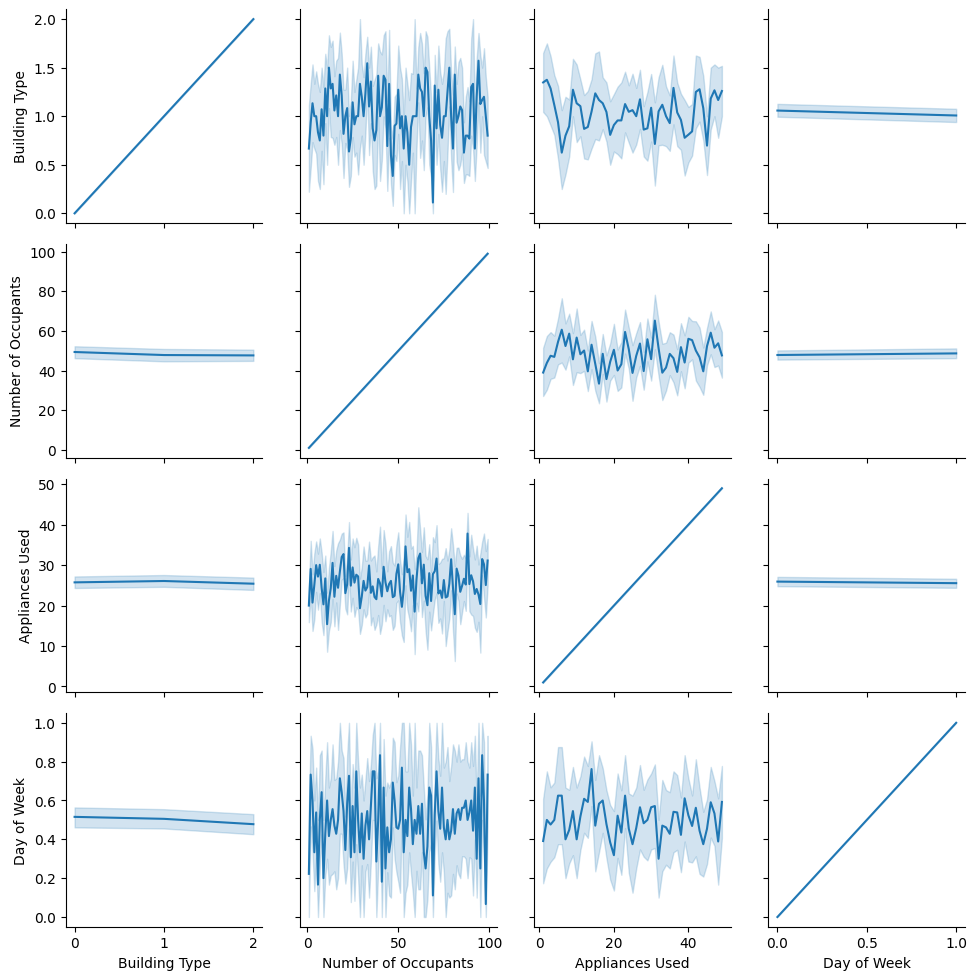

In [26]:
plt.style.use('default')
finalplot = sns.PairGrid(Data_Frame.drop(columns=['Square Footage','Energy Consumption','Average Temperature']))
finalplot.map(sns.lineplot)
plt.show()

In [27]:
Data_Frame.describe()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,1.032727,25500.527273,48.268182,25.730000,22.559745,0.499091,4168.191273
std,0.818809,14236.955632,29.127624,14.116209,7.122357,0.500227,924.278723
min,0.000000,560.000000,1.000000,1.000000,10.050000,0.000000,1683.950000
25%,0.000000,13203.750000,22.000000,13.000000,16.365000,0.000000,3510.460000
50%,1.000000,25785.500000,47.000000,26.000000,22.810000,0.000000,4189.690000
75%,2.000000,37536.750000,73.000000,38.000000,28.760000,1.000000,4859.510000
max,2.000000,49997.000000,99.000000,49.000000,34.990000,1.000000,6530.600000


<a id="4"></a>
# <p style="background-color:green;font-family:David;font-size:120%;color:white;text-align:center;border-radius:50px 50px; padding:7px">Machine Learning make the linear regression</p>



In [28]:
X = Data_Frame.drop(['Energy Consumption'],axis=1)
y = Data_Frame['Energy Consumption']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#going to the modeling machine learning 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [29]:
from sklearn.model_selection import GridSearchCV
params_grid = { 
    'positive' : [True,False],
    'fit_intercept' : [True,False]}
reg_base_on_the_gsc = GridSearchCV(estimator=regressor,param_grid=params_grid,scoring=["r2",'neg_mean_absolute_percentage_error'],refit='r2')
reg_base_on_the_gsc.fit(x_train,y_train)
reg_base_on_the_gsc.best_params_

{'fit_intercept': True, 'positive': False}

In [30]:
regressor = LinearRegression(fit_intercept =  True, positive = False)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [31]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test,y_pred)
ECS = metrics.explained_variance_score(y_test,y_pred)
ME = metrics.max_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
print('mean squared error :',MSE)
print('explained variances core :',ECS)
print('max error :',ME)
print('r2 score :',r2)

mean squared error : 0.00019551065678127482
explained variances core : 0.9999999997659393
max error : 0.022026741148692963
r2 score : 0.999999999765845


In [32]:
regressor.coef_

array([-5.00000315e+02,  4.99999976e-02,  9.99999428e+00,  2.00000220e+01,
       -4.99998282e+00, -5.00016026e+01])

In [33]:
#virtulaziation steps 
#in this step i wanna plot each feature (discrete and contnuous) with target. 
overfit_test = go.Figure()
overfit_test.add_trace(go.Scatter(x=x_test['Square Footage'].sort_values(), y=y_test,name='Real values',line_color='red'))
overfit_test.add_trace(go.Scatter(x=x_test['Square Footage'].sort_values(), y=y_pred,name = 'Model predictions',line_color='yellow'))
overfit_test.update_layout(template = 'plotly_dark',height=650,yaxis_title='Square Footage',xaxis_title="Energy Consumption",title='Square Footage And Energy Consumption')

In [34]:
#going to preprocessing and normalizing the data set 
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1)) #because i havent each negative sample 
X = Scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)
regressor2 = LinearRegression()
reg_base_on_the_gsc = GridSearchCV(estimator=regressor2,param_grid=params_grid,scoring=["r2",'neg_mean_absolute_percentage_error'],refit='r2')
reg_base_on_the_gsc.fit(X_train,y_train)
reg_base_on_the_gsc.best_score_
reg_base_on_the_gsc.best_params_
#we so font use the positive false 

{'fit_intercept': True, 'positive': False}

In [35]:
regressor3 = LinearRegression(fit_intercept=True,positive=True)
regressor3.fit(X_train,y_train)

LinearRegression(positive=True)

In [36]:
counter = range(-1000,1000,50)
Score_save = []
for i in counter:
    new_coef= np.array([i,2475,982,976,0,0])
    regressor3.coef_ = new_coef
    y_pred = regressor3.predict(X_test)
    Score_save.append(metrics.r2_score(y_test,y_pred))
    print(new_coef)
    for i2 in counter:
            new_coef= np.array([i,2475,982,976,i2,0])
            regressor3.coef_ = new_coef
            y_pred = regressor3.predict(X_test)
            Score_save.append(metrics.r2_score(y_test,y_pred))
            print(new_coef)
            for i3 in counter:
                  new_coef= np.array([i,2475,982,976,i2,i3])
                  regressor3.coef_ = new_coef
                  y_pred = regressor3.predict(X_test)
                  Score_save.append(metrics.r2_score(y_test,y_pred))
                  print(new_coef)

Score_save = np.array(Score_save)
Score_save.max()
print('the best coef is in the this index :' ,np.argmax(Score_save))

[-1000  2475   982   976     0     0]
[-1000  2475   982   976 -1000     0]
[-1000  2475   982   976 -1000 -1000]
[-1000  2475   982   976 -1000  -950]
[-1000  2475   982   976 -1000  -900]
[-1000  2475   982   976 -1000  -850]
[-1000  2475   982   976 -1000  -800]
[-1000  2475   982   976 -1000  -750]
[-1000  2475   982   976 -1000  -700]
[-1000  2475   982   976 -1000  -650]
[-1000  2475   982   976 -1000  -600]
[-1000  2475   982   976 -1000  -550]
[-1000  2475   982   976 -1000  -500]
[-1000  2475   982   976 -1000  -450]
[-1000  2475   982   976 -1000  -400]
[-1000  2475   982   976 -1000  -350]
[-1000  2475   982   976 -1000  -300]
[-1000  2475   982   976 -1000  -250]
[-1000  2475   982   976 -1000  -200]
[-1000  2475   982   976 -1000  -150]
[-1000  2475   982   976 -1000  -100]
[-1000  2475   982   976 -1000   -50]
[-1000  2475   982   976 -1000     0]
[-1000  2475   982   976 -1000    50]
[-1000  2475   982   976 -1000   100]
[-1000  2475   982   976 -1000   150]
[-1000  2475

In [37]:
Score_save[9378]
len(Score_save)

65640

In [38]:
counter = range(-1000,1000,50)
Score_save = []
step = 0
for i in counter:
    new_coef= np.array([i,2475,982,976,0,0])
    regressor3.coef_ = new_coef
    y_pred = regressor3.predict(X_test)
    Score_save.append(metrics.r2_score(y_test,y_pred))
    step += 1 

    for i2 in counter:
            new_coef= np.array([i,2475,982,976,i2,0])
            regressor3.coef_ = new_coef
            y_pred = regressor3.predict(X_test)
            Score_save.append(metrics.r2_score(y_test,y_pred))
            step += 1 

            for i3 in counter:
                  new_coef= np.array([i,2475,982,976,i2,i3])
                  regressor3.coef_ = new_coef
                  y_pred = regressor3.predict(X_test)
                  Score_save.append(metrics.r2_score(y_test,y_pred))
                  step += 1 
                  
                  if step == 9378:
                        print(new_coef)
                        break
print('done!')

[-750 2475  982  976  400  100]
done!


In [39]:
new_coef = np.array([-750 ,2475 , 982 , 976 , 400 , 100])
regressor3.coef_ = new_coef
y_pred = regressor3.predict(X_test)
print('train and learn score :',regressor3.score(X_train,y_train))
print('test and predict precent score :',metrics.r2_score(y_test,y_pred)*100)

train and learn score : 0.9238773498280521
test and predict precent score : 92.69593418646652


In [40]:
len(y_test)
y_test

328    3708.08
688    3372.20
413    5023.85
788    3314.91
244    3984.20
        ...   
319    5338.17
979    3240.14
919    4224.59
989    4979.87
724    4517.48
Name: Energy Consumption, Length: 220, dtype: float64

In [41]:
X_test_2 = pd.DataFrame(X_test,columns= x_test.columns)
X_test_2['Energy Consumption'] = y_test

X_test_3 = pd.DataFrame(X_test,columns= x_test.columns)
X_test_3['Energy Consumption'] = y_pred

In [42]:
#virtulaziation steps 
#in this step i wanna plot each feature (discrete and contnuous) with target. 
overfit_test = go.Figure()
overfit_test.add_trace(go.Scatter(x=X_test_2['Square Footage'].sort_values(), y=y_test,name='Real values',line_color='red'))
overfit_test.add_trace(go.Scatter(x=X_test_2['Square Footage'].sort_values(), y=y_pred,name = 'Model predictions',line_color='yellow'))
overfit_test.update_layout(template = 'plotly_dark',height=650,yaxis_title='Square Footage',xaxis_title="Energy Consumption",title='Square Footage And Energy Consumption')

In [43]:
Select_Feature = ['Square Footage','Number of Occupants','Appliances Used','Average Temperature']
for i in Select_Feature:
    scatter_test = go.Figure()
    scatter_test.add_trace(go.Scatter(x=X_test_2[i].sort_values(), y=y_test,name='Real values',line_color='red',mode='markers'))
    scatter_test.add_trace(go.Scatter(x=X_test_3[i].sort_values(), y=y_pred,name = 'Model predictions',line_color='yellow',mode='lines'))
    scatter_test.update_layout(template = 'plotly_dark',height=650,yaxis_title='Square Footage',xaxis_title="Energy Consumption",title='Square Footage And Energy Consumption')
    scatter_test.show()

In [44]:
#final predict 
Scaler = MinMaxScaler(feature_range=(0,1)) #because i havent each negative sample 
X = Scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)
regressor_final =LinearRegression(fit_intercept=True,positive=True)
regressor_final.fit(X_train,y_train)
regressor_final.coef_ = new_coef
y_pred = regressor_final.predict(X_test)

In [45]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)
comparing = pd.DataFrame({'Real' :np.ceil(y_test.flatten()),'Predict' : np.ceil(y_pred.flatten())})
Table2 = go.Figure(data=[go.Table(header = dict (values = ['Real' , ' Predict'], line_color = 'tan',fill_color = 'darkslategray',align = 'left'), cells = dict(values=[comparing['Real'], comparing['Predict']],line_color = ' red' , fill_color = 'darkslategray',align = 'left'))])
Table2.update_layout(autosize = True,template = 'plotly_dark',title = 'Predict Values Vs Real Values')
Table2.show()

In [46]:
print(metrics.max_error(y_test,y_pred))

596.091281866703


In [47]:
Data_Frame

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,2,7063,76,10,29.84,0,2713.95
1,1,44372,66,45,16.72,0,5744.99
2,0,19255,37,17,14.30,1,4101.24
3,2,13265,14,41,32.82,0,3009.14
4,1,13375,26,18,11.92,0,3279.17
...,...,...,...,...,...,...,...
1095,1,1161,81,11,15.45,1,3010.81
1096,2,37943,50,23,21.73,1,4248.49
1097,1,1558,27,29,16.86,1,2843.60
1098,0,2145,56,12,11.77,1,3348.39


<a id="5"></a>
# <p style="background-color:green;font-family:David;font-size:120%;color:white;text-align:center;border-radius:50px 50px; padding:7px">Final inout and predict the unseen data</p>

In [48]:
data = [  
    [1, 1500, 4, 5, 24, 0],  
    [2, 3000, 10, 15, 23, 0],  
    [0, 5000, 20, 28, 20, 0],  
    [1, 1200, 2, 3, 27, 1],  
    [2, 2500, 15, 12, 22, 1],  
    [1, 4000, 5, 10, 21, 0],  
    [0, 3500, 8, 30, 25, 1],  
    [2, 6000, 30, 20, 19, 0],  
    [1, 1800, 3, 8, 26, 1],  
    [0, 4500, 18, 25, 18, 0]  
]  
columns = ['Building Type', 'Square Footage', 'Number of Occupants',  
           'Appliances Used', 'Average Temperature', 'Day of Week']  
x_input = pd.DataFrame(data, columns=columns)  
X_input = Scaler.fit_transform(x_input)
y_predicted_input = regressor_final.predict(X_input)
y_predicted_input = y_predicted_input.reshape(-1,1)
y_predicted_input

array([[2104.72531921],
       [3030.62842768],
       [5499.18530598],
       [2040.9319991 ],
       [2895.28418164],
       [3476.26665519],
       [4699.40918164],
       [5281.89496207],
       [2521.67472397],
       [4973.89661551]])

In [49]:
x_input['Energy Consumption'] = y_predicted_input
x_input['Building Type'].replace(0, 'Industrial' ,inplace=True)
x_input['Building Type'].replace(1,'Commercial',inplace=True)
x_input['Building Type'].replace(2,'Residential',inplace=True)

x_input['Day of Week'].replace(0,'Weekday' ,inplace=True)
x_input['Day of Week'].replace(1,'Weekend' ,inplace=True)
x_input.style.background_gradient(Green_Theme)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Commercial,1500,4,5,24,Weekday,2104.725319
1,Residential,3000,10,15,23,Weekday,3030.628428
2,Industrial,5000,20,28,20,Weekday,5499.185306
3,Commercial,1200,2,3,27,Weekend,2040.931999
4,Residential,2500,15,12,22,Weekend,2895.284182
5,Commercial,4000,5,10,21,Weekday,3476.266655
6,Industrial,3500,8,30,25,Weekend,4699.409182
7,Residential,6000,30,20,19,Weekday,5281.894962
8,Commercial,1800,3,8,26,Weekend,2521.674724
9,Industrial,4500,18,25,18,Weekday,4973.896616


In [50]:
#done !! 
#thank you for visit this notebook 